In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder

In [17]:
df = pd.read_csv('E:\datascience_durga\sampledata\Invistico_Airline.csv')
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [31]:
#Encode text class fields into binary numbers and concat it horizantally with other binary number fields
encoding = OrdinalEncoder()
X = pd.concat((pd.DataFrame(encoding.fit_transform(df[['Gender','Customer Type','Class']]),columns=['Gender','Customer Type','Class']), df.loc[:,'Seat comfort':'Online boarding']),axis=1)
X.head()             

,Gender,Customer Type,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0.0,0.0,1.0,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1.0,0.0,0.0,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0.0,0.0,1.0,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0.0,0.0,1.0,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0.0,0.0,1.0,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [32]:
def convert_ratings(x):
    if x>2:
        return 1
    else:
        return 0

In [33]:
#conver values into binary numbers
X= X.applymap(convert_ratings)

In [34]:
X.head()

,Gender,Customer Type,Class,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,0
1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1


In [35]:
y= df['satisfaction']

In [45]:
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=10)
X_train.shape,X_test.shape

((97410, 17), (32470, 17))

In [46]:
model=CategoricalNB()
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.717215891592239, 0.7145980905451186)

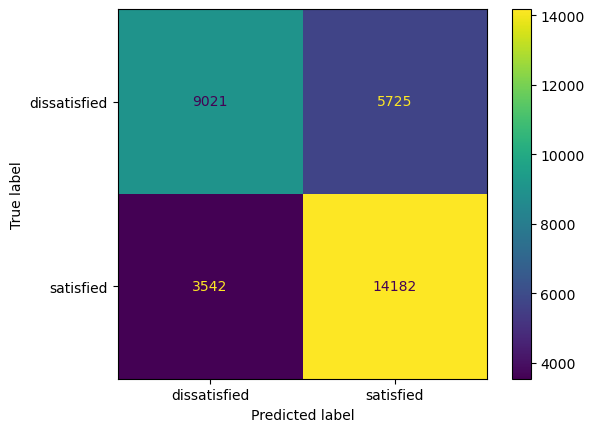

In [38]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)
plt.show()

In [44]:
#same sample with decision tree
model=DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
model.score(X_train,y_train),model.score(X_test,y_test)

(0.8308079252643465, 0.8226978749615029)